In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
dataset = pd.read_csv("final_haralick_reduced.csv")
#dataset[13]=dataset.loc[:,13].replace(0,-1)
#np.unique(dataset[13],return_counts=True)
dataset

,Angular Second Momentum,Contrast,Correlation,Variance,Inv Diff Moment,Sum Avg,Entropy,info measure correlation1,info measure correlation2,Target
0,0.01015,135.19150,0.98946,6414.05507,0.30407,234.51310,11.03752,-0.44890,0.99913,0
1,0.01873,441.95107,0.96673,6643.79951,0.34234,184.16846,10.78333,-0.44216,0.99887,0
2,0.10442,386.96686,0.97581,7995.75022,0.44277,157.32084,9.16894,-0.45793,0.99779,0
3,0.00998,589.92963,0.95081,5997.66246,0.33334,177.00626,11.07169,-0.44521,0.99908,0
4,0.09590,113.81385,0.99285,7961.72046,0.39579,194.66891,9.66212,-0.45949,0.99841,0
...,...,...,...,...,...,...,...,...,...,...
423,0.06968,461.15009,0.93635,3656.26936,0.67364,56.67079,6.78050,-0.58536,0.99811,1
424,0.01897,187.39608,0.98439,5999.95008,0.54625,113.82462,8.78204,-0.55021,0.99934,1
425,0.01071,633.80351,0.95138,6521.68113,0.34056,177.34390,11.04060,-0.44609,0.99906,1
426,0.02935,462.38468,0.95931,5687.21328,0.46093,121.33385,9.64733,-0.50675,0.99925,1


In [3]:
# input
x = dataset.iloc[:,:-1].values
# output
y = dataset.iloc[:,-1].values
x.shape,y.shape

((428, 9), (428,))

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y = np.array(enc.fit_transform(y.reshape(-1, 1)).toarray())
y.shape

(428, 2)

In [5]:
# Documentation??

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((299, 9), (129, 9), (299, 2), (129, 2))

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [8]:
classifier = Sequential()
#add input layer and first hidden layer
classifier.add(Dense(25, input_shape= (9, )))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(50))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(25))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(2, activation = 'softmax'))
#[p0, p1]

In [9]:
classifier.compile(optimizer='Adam', loss ='binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                250       
_________________________________________________________________
batch_normalization (BatchNo (None, 25)                100       
_________________________________________________________________
activation (Activation)      (None, 25)                0         
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0

In [10]:
history = classifier.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size = 100, epochs = 400, verbose=2)

Epoch 1/400
3/3 - 2s - loss: 0.9275 - accuracy: 0.4582 - val_loss: 0.6992 - val_accuracy: 0.4186
Epoch 2/400
3/3 - 0s - loss: 0.8084 - accuracy: 0.5518 - val_loss: 0.6933 - val_accuracy: 0.4419
Epoch 3/400
3/3 - 0s - loss: 0.8376 - accuracy: 0.5284 - val_loss: 0.6881 - val_accuracy: 0.4651
Epoch 4/400
3/3 - 0s - loss: 0.8129 - accuracy: 0.5117 - val_loss: 0.6832 - val_accuracy: 0.4806
Epoch 5/400
3/3 - 0s - loss: 0.8080 - accuracy: 0.5050 - val_loss: 0.6788 - val_accuracy: 0.5039
Epoch 6/400
3/3 - 0s - loss: 0.7919 - accuracy: 0.5284 - val_loss: 0.6746 - val_accuracy: 0.5426
Epoch 7/400
3/3 - 0s - loss: 0.7710 - accuracy: 0.5117 - val_loss: 0.6707 - val_accuracy: 0.5736
Epoch 8/400
3/3 - 0s - loss: 0.7635 - accuracy: 0.5853 - val_loss: 0.6669 - val_accuracy: 0.6202
Epoch 9/400
3/3 - 0s - loss: 0.7094 - accuracy: 0.5953 - val_loss: 0.6633 - val_accuracy: 0.6279
Epoch 10/400
3/3 - 0s - loss: 0.7438 - accuracy: 0.5786 - val_loss: 0.6597 - val_accuracy: 0.6434
Epoch 11/400
3/3 - 0s - loss:

In [11]:
ypred = classifier.predict(xtest)
ypred.shape

(129, 2)

In [12]:
np.sum(np.argmax(ypred, axis=1)== np.argmax(ytest, axis=1))/(len(ypred))

0.8604651162790697

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(np.argmax(ytest,axis=1),np.argmax(ypred,axis=1)))
print(recall_score(np.argmax(ytest,axis=1),np.argmax(ypred,axis=1)))
print(f1_score(np.argmax(ytest,axis=1),np.argmax(ypred,axis=1)))

0.9534883720930233
0.7192982456140351
0.8200000000000001


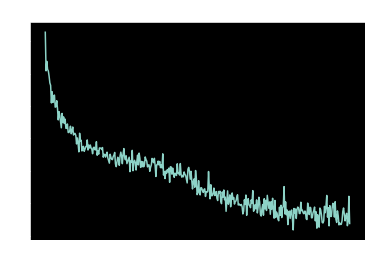

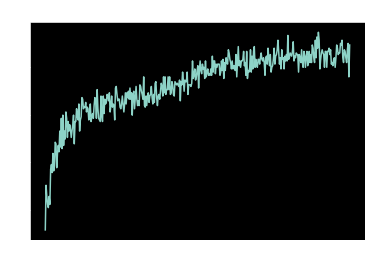

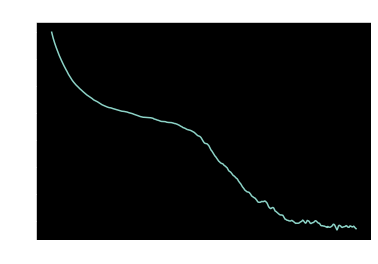

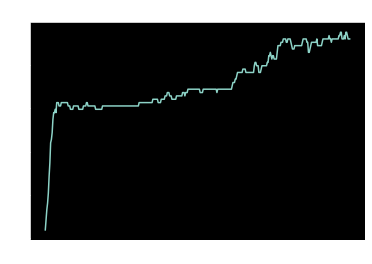

In [17]:
for i in history.history.keys():
    plt.plot(history.history[i])
    plt.title(i)
    plt.show()
